Importing needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


1. Data Exploration

In [2]:
data = pd.read_csv("/Users/mehrac/Desktop/DSA-Python/income_evaluation.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

There is empty space in every column name except "age". Lets remove those


In [3]:
data.columns = data.columns.str.replace(" ", "")
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Lets also change "-" to "_" in column names

In [4]:
data.columns = data.columns.str.replace("-", "_")
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
data["age"].value_counts()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

In [11]:
data["education"].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [12]:
data["occupation"].value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [13]:
data["relationship"].value_counts()

relationship
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

In [14]:
data["workclass"].value_counts()


workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [15]:
data["race"].value_counts()


race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [16]:
data["sex"].value_counts()


sex
 Male      21790
 Female    10771
Name: count, dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Now lets encode income and gender columns, since they only have 2 categories

In [5]:
data["sex"] = data["sex"].apply(lambda x: 1 if x == " Male" else 0)
data["income"] = data["income"].apply(lambda x: 1 if x == " >50K" else 0)
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,0


Lets change categorical features that have more than 2 categories into binary features in order to find correlation between them. We will also remove the original categorical columns

In [6]:
data = pd.concat([data.drop("workclass", axis=1), pd.get_dummies(data.workclass, dtype=int).add_prefix("workclass_")], axis = 1)
data = data.drop("education", axis=1)
data = pd.concat([data.drop("marital_status", axis = 1), pd.get_dummies(data.marital_status, dtype=int).add_prefix("marital_status_")], axis = 1)
data = pd.concat([data.drop("occupation", axis = 1), pd.get_dummies(data.occupation, dtype=int).add_prefix("occupation_")], axis = 1)
data = pd.concat([data.drop("relationship", axis = 1), pd.get_dummies(data.relationship, dtype=int).add_prefix("relationship_")], axis = 1)
data = pd.concat([data.drop("race", axis = 1), pd.get_dummies(data.race, dtype=int).add_prefix("race_")], axis = 1)
data = pd.concat([data.drop("native_country", axis = 1), pd.get_dummies(data.native_country, dtype=int).add_prefix("native_country_")], axis = 1)
data

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,workclass_ ?,workclass_ Federal-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,1,0,0,20,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
data["income"].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

Lets see correlation between features and income

In [7]:
data.corr()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,workclass_ ?,workclass_ Federal-gov,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
age,1.000000,-0.076646,0.036527,0.088832,0.077674,5.777454e-02,0.068756,0.234037,0.042627,0.051227,...,0.004242,0.008374,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.015917,-0.015054,0.000375
fnlwgt,-0.076646,1.000000,-0.043195,0.026858,0.000432,-1.025171e-02,-0.018768,-0.009463,-0.002923,-0.007525,...,-0.013152,0.007164,-0.003790,-0.012365,-0.001252,-0.001250,0.005273,-0.075287,-0.011398,0.005501
education_num,0.036527,-0.043195,1.000000,0.012280,0.122630,7.992296e-02,0.148123,0.335154,-0.077946,0.060518,...,-0.044286,-0.041269,0.001264,0.016046,0.049472,0.007896,-0.017071,0.101207,-0.007483,-0.001234
sex,0.088832,0.026858,0.012280,1.000000,0.048480,4.556735e-02,0.229309,0.215980,-0.065556,0.000989,...,0.000464,-0.015791,-0.003504,-0.004663,0.003088,-0.014012,-0.012744,-0.006993,-0.001205,0.006753
capital_gain,0.077674,0.000432,0.122630,0.048480,1.000000,-3.161506e-02,0.078409,0.223329,-0.015585,-0.005768,...,-0.003879,-0.006103,-0.001680,0.005323,0.005735,-0.003432,-0.003526,0.004599,-0.002564,-0.002193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native_country_ Thailand,-0.006271,-0.001250,0.007896,-0.014012,-0.003432,-5.095482e-03,0.009537,-0.004078,-0.000085,-0.004099,...,-0.000793,-0.001394,-0.000452,-0.001167,-0.000932,1.000000,-0.000568,-0.068978,-0.001068,-0.000521
native_country_ Trinadad&Tobago,0.004843,0.005273,-0.017071,-0.012744,-0.003526,8.102329e-03,-0.006006,-0.007660,-0.000393,-0.004212,...,-0.000815,-0.001432,-0.000464,-0.001199,-0.000957,-0.000568,1.000000,-0.070869,-0.001097,-0.000536
native_country_ United-States,0.015917,-0.075287,0.101207,-0.006993,0.004599,8.783567e-03,0.002446,0.034470,0.006193,0.015441,...,-0.098924,-0.173848,-0.056315,-0.145558,-0.116167,-0.068978,-0.070869,1.000000,-0.133180,-0.065031
native_country_ Vietnam,-0.015054,-0.011398,-0.007483,-0.001205,-0.002564,-5.997599e-07,-0.011379,-0.017649,-0.002286,0.000099,...,-0.001532,-0.002692,-0.000872,-0.002254,-0.001799,-0.001068,-0.001097,-0.133180,1.000000,-0.001007


In [7]:
correlations = data.corr()['income'].abs()
correlations

age                                0.234037
fnlwgt                             0.009463
education_num                      0.335154
sex                                0.215980
capital_gain                       0.223329
                                     ...   
native_country_ Thailand           0.004078
native_country_ Trinadad&Tobago    0.007660
native_country_ United-States      0.034470
native_country_ Vietnam            0.017649
native_country_ Yugoslavia         0.006959
Name: income, Length: 92, dtype: float64

In [8]:
data.columns

Index(['age', 'fnlwgt', 'education_num', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital_status_ Divorced', 'marital_status_ Married-AF-spouse',
       'marital_status_ Married-civ-spouse',
       'marital_status_ Married-spouse-absent',
       'marital_status_ Never-married', 'marital_status_ Separated',
       'marital_status_ Widowed', 'occupation_ ?', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protec

<Axes: >

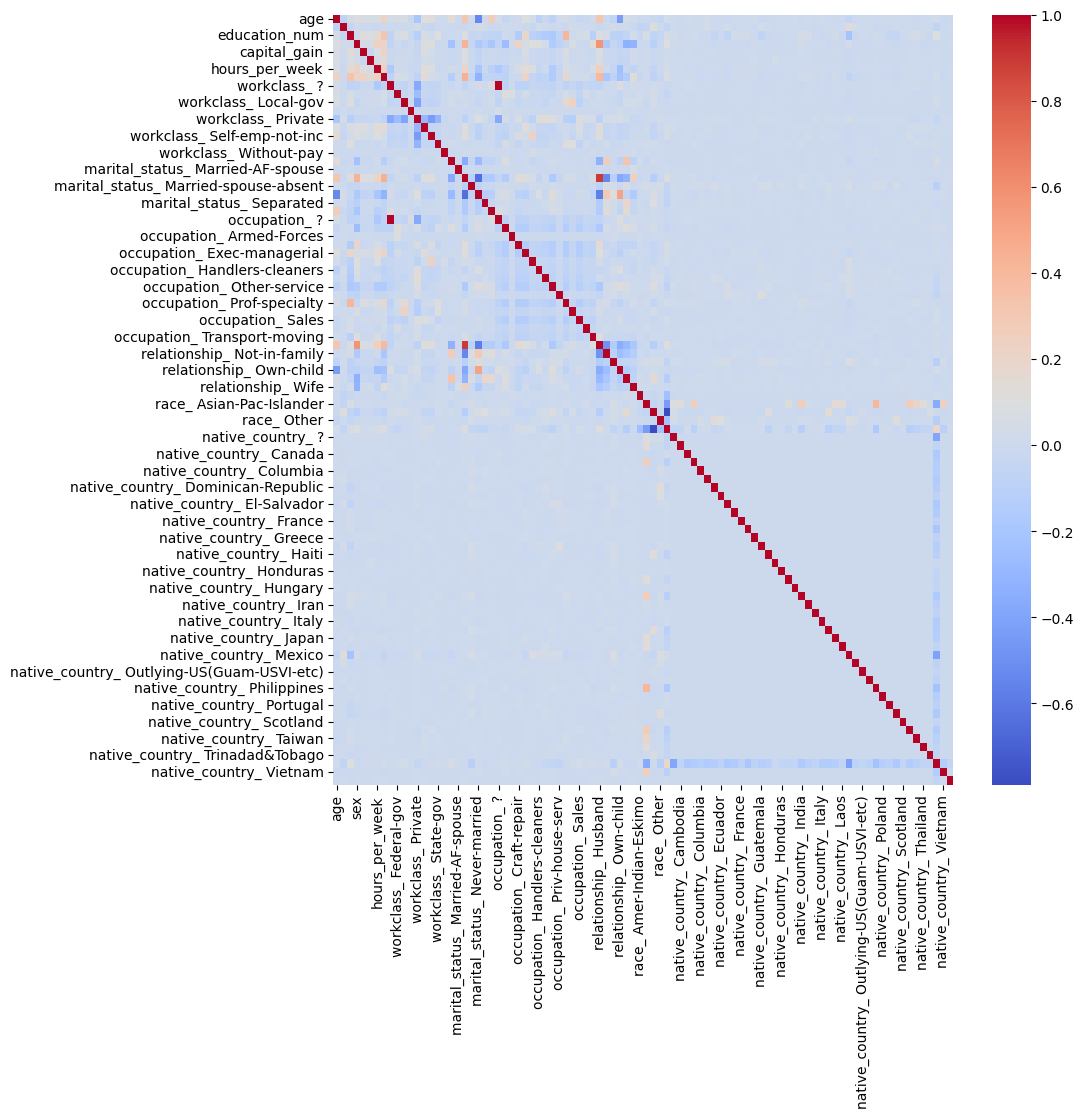

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cmap="coolwarm")

Lets try to drop columns with significance less than 0.05. We are not going to use those features because of their low level of significance

In [8]:
threshold = 0.05
insignificant_features = correlations[abs(correlations) < threshold].index.tolist()
data_filtered = data.drop(columns = insignificant_features)
data_filtered

,age,education_num,sex,capital_gain,capital_loss,hours_per_week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Private,...,occupation_ Prof-specialty,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Black,race_ White,native_country_ Mexico
0,39,13,1,2174,0,40,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,50,13,1,0,0,13,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,38,9,1,0,0,40,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,53,7,1,0,0,40,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,28,13,0,0,0,40,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,0,38,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
32557,40,9,1,0,0,40,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
32558,58,9,0,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
32559,22,9,1,0,0,20,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


Now we only have 33 features instead of 92 at the beginning

In [15]:
insignificant_features

['fnlwgt',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'marital_status_ Married-AF-spouse',
 'marital_status_ Married-spouse-absent',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Priv-house-serv',
 'occupation_ Protective-serv',
 'occupation_ Sales',
 'occupation_ Tech-support',
 'occupation_ Transport-moving',
 'race_ Amer-Indian-Eskimo',
 'race_ Asian-Pac-Islander',
 'race_ Other',
 'native_country_ ?',
 'native_country_ Cambodia',
 'native_country_ Canada',
 'native_country_ China',
 'native_country_ Columbia',
 'native_country_ Cuba',
 'native_country_ Dominican-Republic',
 'native_country_ Ecuador',
 'native_country_ El-Salvador',
 'native_country_ England',
 'native_country_ France',
 'native_country_ Germany',
 'native_country_ Greece',
 'native_country_ Guatemala',
 'native_country_ Haiti',
 'native_country_ Holand-Netherlands',
 'native_country_ Honduras',
 

<Axes: >

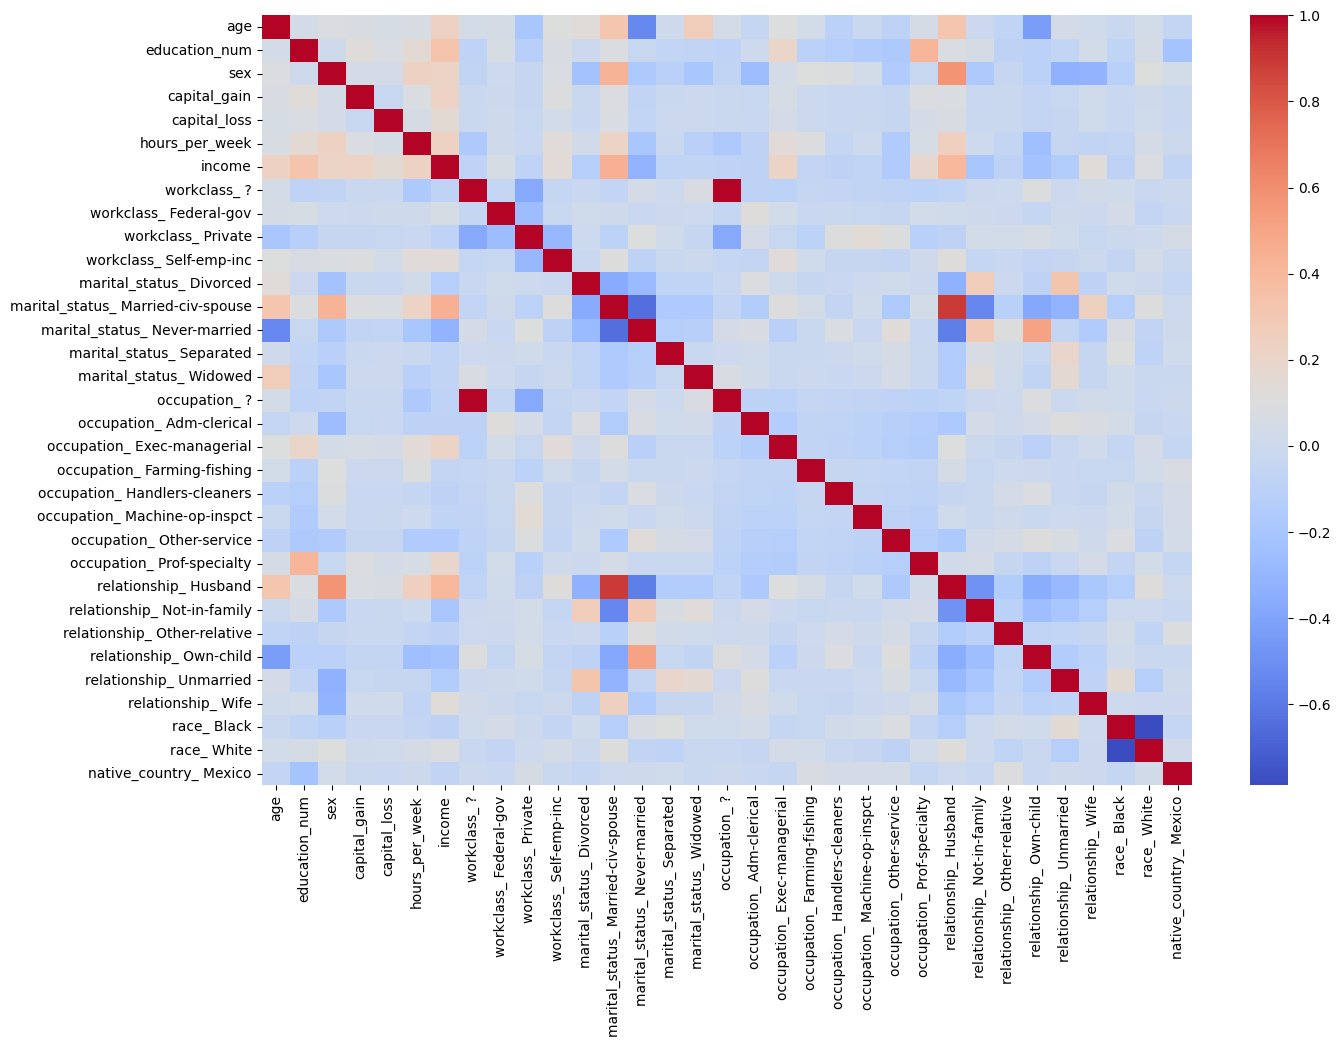

In [16]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_filtered.corr(), cmap="coolwarm")

Lets Use Random Forest since we have many binary features and very few numeric features. We will use all of our features for the first model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [10]:
train_data, test_data = train_test_split(data_filtered, test_size=0.2)

In [11]:
train_X = train_data.drop("income", axis=1)
train_y = train_data["income"]
test_X = test_data.drop("income", axis=1)
test_y = test_data["income"]

In [12]:
forrest = RandomForestClassifier()
forrest.fit(train_X, train_y)
forrest.score(test_X, test_y)

0.8467680024566252

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

y_pred_forrest = forrest.predict(test_X)
cm_forest = confusion_matrix(test_y, y_pred_forrest)
print(classification_report(test_y, y_pred_forrest))
print('Confusion matric for Random Forest:''\n\n', cm_forest)
print("Accuracy Score:", accuracy_score(test_y, y_pred_forrest))
print("Precision Score:", precision_score(test_y, y_pred_forrest))
print("F1 score:", f1_score(test_y, y_pred_forrest))
print("Recall score:", recall_score(test_y, y_pred_forrest))
print("ROC AUC Score:", roc_auc_score(test_y, y_pred_forrest))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4938
           1       0.71      0.61      0.66      1575

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513

Confusion matric for Random Forest:

 [[4547  391]
 [ 607  968]]
Accuracy Score: 0.8467680024566252
Precision Score: 0.7122884473877852
F1 score: 0.6598500340831629
Recall score: 0.6146031746031746
ROC AUC Score: 0.7677106598005747


Lets do Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression as LogReg
classifier = LogReg(random_state= 42)
log_model = classifier.fit(train_X, train_y)
y_pred_log = log_model.predict(test_X)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
log_model.score(test_X, test_y)

0.8053124520190389

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
cm_logistic = confusion_matrix(test_y, y_pred_log)
print(classification_report(test_y, y_pred_log))
print('Confusion matric for LogReg:''\n\n', cm_logistic)
print("Accuracy Score:", accuracy_score(test_y, y_pred_log))
print("Precision Score:", precision_score(test_y, y_pred_log))
print("F1 score:", f1_score(test_y, y_pred_log))
print("Recall score:", recall_score(test_y, y_pred_log))
print("ROC AUC Score:", roc_auc_score(test_y, y_pred_log))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      4938
           1       0.63      0.47      0.54      1575

    accuracy                           0.81      6513
   macro avg       0.74      0.69      0.71      6513
weighted avg       0.79      0.81      0.79      6513

Confusion matric for LogReg:

 [[4512  426]
 [ 842  733]]
Accuracy Score: 0.8053124520190389
Precision Score: 0.6324417601380501
F1 score: 0.5362106803218727
Recall score: 0.4653968253968254
ROC AUC Score: 0.6895635402804298


As a result, we can observe that random forrest model has a better result in this case